**Matt's email:**

I have heard from analysts (and so this might not extend to everyone) that the place in the MD&A they turn first—if at all, of course—is the risk factors/analysis section.
 
I think what they’re looking for is whether anything has changed, whether a word here or there, or risks added/deleted.
 
Essentially, I think that if you could teach how do I compare this to that quickly and produce a report that is easy to use would be very impressive (to me, at least). In which case, it doesn’t matter what part of the MD&A you’re looking at.
 
Hope this helps.


### Additional lead -- article plus Colab notebook

https://colab.research.google.com/gist/janlukasschroeder/cadd36edd13f1b3420cc63814907a65d/summarize-sec-filings-with-openai-gpt3.ipynb

https://medium.com/@jan_5421/summarize-sec-filings-with-openai-gtp3-a363282d8d8

#### Check
https://github.com/areed1192/sigma_coding_youtube/blob/master/python/python-finance/sec-web-scraping/Web%20Scraping%20SEC%20-%20Parsing%20SEC%20Documents%20-%20New%20Filings.ipynb

In [225]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [246]:
#http://pandas.pydata.org/pandas-docs/stable/options.html
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 150)


### 0001564590-19-027952
  <a name="ITEM_1A_RISK_FACTORS"></a>
  
  <a name="ITEM_1B_UNRESOLVED_STAFF_COMMENTS"></a>

### Data Storage Notes
"I agree that leaving them in your Google Drive and giving the audience access may work. Wouldn't working with 5 - 10 files be too much for the memory in Google Colab? You could also put, say, 4 files in Pandas' dataframes and then have the audience download one directly into their Colab environment or upload one from their local machine. Here is the code to directly download a file from a shared Google Drive link into the Google Colab environment (you would change the URL link with the correct link)."

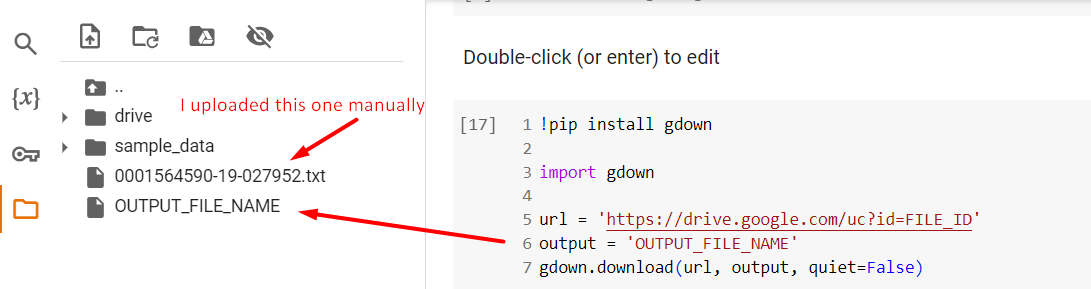

In [307]:
from IPython.display import Image

# Replace 'path/to/your/image.jpg' with the path to your image file
image_path = '/Users/gsaxton/Dropbox/Webinar - Textual Analysis/image.png'

# Display the image
Image(filename=image_path)

In [ ]:
from IPython.display import display, HTML

display(HTML('<h1>Hello, World!!</h1>'))

In [310]:
display(HTML('<p style="margin-bottom:0pt;margin-top:0pt;text-indent:0%;font-weight:bold;font-family:Times New Roman;font-size:10pt;font-style:normal;text-transform:none;font-variant: normal;" id="ITEM_1A_RISK_FACTORS">ITEM 1A. RISK FACTORS</p> <p style="margin-top:4pt;margin-bottom:0pt;text-indent:4.54%;font-style:italic;font-family:Times New Roman;font-size:10pt;font-weight:normal;text-transform:none;font-variant: normal;">You should carefully consider the risks described below together with the other information set forth in this report, which could materially affect our business, financial condition and future results. The risks described below are not the only risks facing our company. Risks and uncertainties not currently known to us or that we currently deem to be immaterial also may materially adversely affect our business, financial condition and operating results. </p> <p style="margin-top:14pt;margin-bottom:0pt;text-indent:0%;font-weight:bold;font-family:Times New Roman;font-size:10pt;font-style:normal;text-transform:none;font-variant: normal;">Risks Related to Our Ability to Grow Our Business</p> <p style="margin-top:4pt;margin-bottom:0pt;margin-left:4.54%;text-indent:0%;font-weight:bold;font-style:italic;font-family:Times New Roman;font-size:10pt;text-transform:none;font-variant: normal;">We may be impacted by macroeconomic conditions resulting from the global COVID-19 pandemic.</p> '))


#### Accession Numbers

<br>
"Accession number: In the example above, 0001193125-15-118890 is the accession number, a unique identifier assigned automatically to an accepted submission by EDGAR. The first set of numbers (0001193125) is the CIK of the entity submitting the filing. This could be the company or a third-party filer agent. Some filer agents without a regulatory requirement to make disclosure filings with the SEC have a CIK but no searchable presence in the public EDGAR database. The next two numbers (15) represent the year. The last series of numbers represent a sequential count of submitted filings from that CIK. The count is usually, but not always, reset to zero at the start of each calendar year." 

https://www.sec.gov/os/accessing-edgar-data

https://pypi.org/project/sec-edgar-downloader/

https://sec-edgar-downloader.readthedocs.io/en/latest/

In [1]:
from sec_edgar_downloader import Downloader

In [ ]:
# Initialize a downloader instance. Download filings to the current
# working directory. Must declare company name and email address
# to form a user-agent string that complies with the SEC Edgar's
# programmatic downloading fair access policy.
# More info: https://www.sec.gov/os/webmaster-faq#code-support
# Company name and email are used to form a user-agent of the form:
# User-Agent: <Company Name> <Email Address>
dl = Downloader("MyCompanyName", "my.email@domain.com")

# Get all 8-K filings for Apple (ticker: AAPL)
dl.get("8-K", "AAPL")

# Get all 8-K filings for Apple, including filing amends (8-K/A)
dl.get("8-K", "AAPL", include_amends=True)

# Get all 8-K filings for Apple after January 1, 2017 and before March 25, 2017
# Note: after and before strings must be in the form "YYYY-MM-DD"
dl.get("8-K", "AAPL", after="2017-01-01", before="2017-03-25")

# Get the five most recent 8-K filings for Apple
dl.get("8-K", "AAPL", limit=5)

# Get all 10-K filings for Microsoft
dl.get("10-K", "MSFT")

# Get the latest 10-K filing for Microsoft
dl.get("10-K", "MSFT", limit=1)

# Get all 10-Q filings for Visa
dl.get("10-Q", "V")

# Get all 13F-NT filings for the Vanguard Group
dl.get("13F-NT", "0000102909")

# Get all 13F-HR filings for the Vanguard Group
dl.get("13F-HR", "0000102909")

# Get all SC 13G filings for Apple
dl.get("SC 13G", "AAPL")

# Get all SD filings for Apple
dl.get("SD", "AAPL")

#### Advanced Usage

In [ ]:
from sec_edgar_downloader import Downloader

# Download filings to the current working directory
dl = Downloader("MyCompanyName", "my.email@domain.com", "/path/to/save/location")

# Get all 10-K filings for Microsoft without the filing details
dl.get("10-K", "MSFT", download_details=False)

# Get the latest supported filings, if available, for Apple
for filing_type in dl.supported_filings:
    dl.get(filing_type, "AAPL", limit=1)

# Get the latest supported filings, if available, for a
# specified list of tickers and CIKs
equity_ids = ["AAPL", "MSFT", "0000102909", "V", "FB"]
for equity_id in equity_ids:
    for filing_type in dl.supported_filings:
        dl.get(filing_type, equity_id, limit=1)

# Testing
SEC 10-K/sec-edgar-filings/MSFT/10-K/

In [4]:
pwd

'/Users/gsaxton/Dropbox/ipython_notebooks'

In [5]:
cd "/Users/gsaxton/Dropbox/SEC 10-K"

/Users/gsaxton/Dropbox/SEC 10-K


In [74]:
from sec_edgar_downloader import Downloader

In [75]:
%%time
# Get the five most recent 10-K filings for Microsoft
dl = Downloader("York", "gdsaxton@gmail.com")
# Get all 10-K filings for Microsoft
dl.get("10-K", "MSFT", limit=5)

CPU times: user 84 ms, sys: 22.2 ms, total: 106 ms
Wall time: 986 ms


5

In [137]:
dl.get("10-K", "TSLA", limit=5, download_details=False)

5

### Rename each file to have the accession number

In [138]:
import os

# Set the path to the parent directory
parent_directory = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings'

# Walk through all sub-folders and files in the directory
for root, dirs, files in os.walk(parent_directory):
    for file in files:
        # Check if the file is 'filing.txt'
        if file == 'full-submission.txt':
            # Get the name of the current folder
            folder_name = os.path.basename(root)
            # Construct the old and new file paths
            old_file_path = os.path.join(root, file)
            new_file_path = os.path.join(root, folder_name + '.txt')

            # Rename the file
            os.rename(old_file_path, new_file_path)
            print(f"Renamed '{old_file_path}' to '{new_file_path}'")

Renamed '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/10-K/0001564590-21-004599/full-submission.txt' to '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/10-K/0001564590-21-004599/0001564590-21-004599.txt'
Renamed '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/10-K/0000950170-23-001409/full-submission.txt' to '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/10-K/0000950170-23-001409/0000950170-23-001409.txt'
Renamed '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/10-K/0001564590-20-004475/full-submission.txt' to '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/10-K/0001564590-20-004475/0001564590-20-004475.txt'
Renamed '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/10-K/0000950170-22-000796/full-submission.txt' to '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/10-K/0000950170-22-000796/0000950170-22-000796.txt'
Renamed '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/10-K/0001564590-19-003165/full-submission.txt' t

#### Move all TSLA filings out of their sub-folders into the main TSLA folder

In [139]:
import os
import shutil

# Set the path to the parent directory and the destination directory
parent_directory = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA'
destination_directory = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Walk through all sub-folders and files in the directory
for root, dirs, files in os.walk(parent_directory):
    for file in files:
        # Check if the file is 'filing.txt'
        if file.endswith('.txt'):
            # Get the name of the current folder
            folder_name = os.path.basename(root)
            # Construct the old and new file paths
            old_file_path = os.path.join(root, file)
            new_file_name = folder_name + '.txt'
            new_file_path = os.path.join(destination_directory, new_file_name)

            # Rename and move the file
            os.rename(old_file_path, new_file_path)
            print(f"Moved and renamed '{old_file_path}' to '{new_file_path}'")


Moved and renamed '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/10-K/0001564590-21-004599/0001564590-21-004599.txt' to '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/0001564590-21-004599.txt'
Moved and renamed '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/10-K/0000950170-23-001409/0000950170-23-001409.txt' to '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/0000950170-23-001409.txt'
Moved and renamed '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/10-K/0001564590-20-004475/0001564590-20-004475.txt' to '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/0001564590-20-004475.txt'
Moved and renamed '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/10-K/0000950170-22-000796/0000950170-22-000796.txt' to '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/0000950170-22-000796.txt'
Moved and renamed '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/10-K/0001564590-19-003165/0001564590-19-003165.txt' to '/Users/gsaxton/Dropbox/SEC

#### Move all MSFT filings out of their sub-folders into the main MSFT folder

In [98]:
import os
import shutil

# Set the path to the parent directory and the destination directory
parent_directory = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT'
destination_directory = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Walk through all sub-folders and files in the directory
for root, dirs, files in os.walk(parent_directory):
    for file in files:
        # Check if the file is 'filing.txt'
        if file.endswith('.txt'):
            # Get the name of the current folder
            folder_name = os.path.basename(root)
            # Construct the old and new file paths
            old_file_path = os.path.join(root, file)
            new_file_name = folder_name + '.txt'
            new_file_path = os.path.join(destination_directory, new_file_name)

            # Rename and move the file
            os.rename(old_file_path, new_file_path)
            print(f"Moved and renamed '{old_file_path}' to '{new_file_path}'")


Moved and renamed '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT/10-K/0001564590-21-039151/0001564590-21-039151.txt' to '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT/0001564590-21-039151.txt'
Moved and renamed '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT/10-K/0001564590-22-026876/0001564590-22-026876.txt' to '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT/0001564590-22-026876.txt'
Moved and renamed '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT/10-K/0001564590-19-027952/0001564590-19-027952.txt' to '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT/0001564590-19-027952.txt'
Moved and renamed '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT/10-K/0001564590-20-034944/0001564590-20-034944.txt' to '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT/0001564590-20-034944.txt'
Moved and renamed '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT/10-K/0000950170-23-035122/0000950170-23-035122.txt' to '/Users/gsaxton/Dropbox/SEC

#### Create DataFrame holding data on all downloaded filings

In [140]:
import os
import pandas as pd
from bs4 import BeautifulSoup
import re


# Set the path to the folder containing the text files
folder_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA'

# Initialize an empty DataFrame to store the CIK data
df = pd.DataFrame(columns=['Filename', 'CIK', 'Company Name', 'Reporting Period'])

# Loop over all .txt files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        
        # Open and read the file
        with open(file_path, 'r', encoding='utf-8') as file:
            soup = BeautifulSoup(file, 'html.parser')
            
            # Use regular expression to find the CIK number
            cik_search = re.search('CENTRAL INDEX KEY:?\s+(\d+)', soup.get_text())
            if cik_search:
                cik_number = cik_search.group(1)
            else:
                cik_number = 'Not Found'
                
            name_search = re.search('COMPANY CONFORMED NAME:?\s+([^\n]+)', soup.get_text())
            if name_search:
                name = name_search.group(1).strip()
            else:
                name = 'Not Found'           
                
            period_search = re.search('CONFORMED PERIOD OF REPORT:?\s+(\d+)', soup.get_text())
            if period_search:
                period = period_search.group(1)
            else:
                period = 'Not Found'
                

            # Append the data to the DataFrame
            #df = df.append({'Filename': filename, 'CIK': cik_number}, ignore_index=True)
            df = pd.concat([df, pd.DataFrame.from_records([{'Filename': filename, 'CIK': cik_number,
                                                           'Company Name': name, 'Reporting Period': period}])])
            
            #outputxlsx = pd.concat([outputxlsx, df], ignore_index=True)


# Display the DataFrame
df


,Filename,CIK,Company Name,Reporting Period
0,0000950170-23-001409.txt,0001318605,"Tesla, Inc.",20221231
0,0000950170-22-000796.txt,0001318605,"Tesla, Inc.",20211231
0,0001564590-21-004599.txt,0001318605,"Tesla, Inc.",20201231
0,0001564590-20-004475.txt,0001318605,"Tesla, Inc.",20191231
0,0001564590-19-003165.txt,0001318605,"Tesla, Inc.",20181231


In [141]:
# Set the path to the folder containing the text files
folder_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT'

# Initialize an empty DataFrame to store the CIK data
#df = pd.DataFrame(columns=['Filename', 'CIK', 'Company Name'])

# Loop over all .txt files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        
        # Open and read the file
        with open(file_path, 'r', encoding='utf-8') as file:
            soup = BeautifulSoup(file, 'html.parser')
            
            # Use regular expression to find the CIK number
            cik_search = re.search('CENTRAL INDEX KEY:?\s+(\d+)', soup.get_text())
            if cik_search:
                cik_number = cik_search.group(1)
            else:
                cik_number = 'Not Found'
                
            name_search = re.search('COMPANY CONFORMED NAME:?\s+([^\n]+)', soup.get_text())
            if name_search:
                name = name_search.group(1).strip()
            else:
                name = 'Not Found'            

            period_search = re.search('CONFORMED PERIOD OF REPORT:?\s+(\d+)', soup.get_text())
            if period_search:
                period = period_search.group(1)
            else:
                period = 'Not Found'
                

            # Append the data to the DataFrame
            #df = df.append({'Filename': filename, 'CIK': cik_number}, ignore_index=True)
            df = pd.concat([df, pd.DataFrame.from_records([{'Filename': filename, 'CIK': cik_number,
                                                           'Company Name': name, 'Reporting Period': period}])])
            
            #outputxlsx = pd.concat([outputxlsx, df], ignore_index=True)


# Display the DataFrame
df

,Filename,CIK,Company Name,Reporting Period
0,0000950170-23-001409.txt,0001318605,"Tesla, Inc.",20221231
0,0000950170-22-000796.txt,0001318605,"Tesla, Inc.",20211231
0,0001564590-21-004599.txt,0001318605,"Tesla, Inc.",20201231
0,0001564590-20-004475.txt,0001318605,"Tesla, Inc.",20191231
0,0001564590-19-003165.txt,0001318605,"Tesla, Inc.",20181231
0,0000950170-23-035122.txt,0000789019,MICROSOFT CORP,20230630
0,0001564590-21-039151.txt,0000789019,MICROSOFT CORP,20210630
0,0001564590-22-026876.txt,0000789019,MICROSOFT CORP,20220630
0,0001564590-20-034944.txt,0000789019,MICROSOFT CORP,20200630
0,0001564590-19-027952.txt,0000789019,MICROSOFT CORP,20190630


In [226]:
df['ticker'] = np.where(df['Company Name']=='Tesla, Inc.', 'TSLA', np.NaN)
df

,Filename,CIK,Company Name,Reporting Period,ticker
0,0000950170-23-001409.txt,0001318605,"Tesla, Inc.",20221231,TSLA
0,0000950170-22-000796.txt,0001318605,"Tesla, Inc.",20211231,TSLA
0,0001564590-21-004599.txt,0001318605,"Tesla, Inc.",20201231,TSLA
0,0001564590-20-004475.txt,0001318605,"Tesla, Inc.",20191231,TSLA
0,0001564590-19-003165.txt,0001318605,"Tesla, Inc.",20181231,TSLA
0,0000950170-23-035122.txt,0000789019,MICROSOFT CORP,20230630,nan
0,0001564590-21-039151.txt,0000789019,MICROSOFT CORP,20210630,nan
0,0001564590-22-026876.txt,0000789019,MICROSOFT CORP,20220630,nan
0,0001564590-20-034944.txt,0000789019,MICROSOFT CORP,20200630,nan
0,0001564590-19-027952.txt,0000789019,MICROSOFT CORP,20190630,nan


In [227]:
df['ticker'] = np.where(df['Company Name']=='MICROSOFT CORP', 'MSFT', df['ticker'])
df

,Filename,CIK,Company Name,Reporting Period,ticker
0,0000950170-23-001409.txt,0001318605,"Tesla, Inc.",20221231,TSLA
0,0000950170-22-000796.txt,0001318605,"Tesla, Inc.",20211231,TSLA
0,0001564590-21-004599.txt,0001318605,"Tesla, Inc.",20201231,TSLA
0,0001564590-20-004475.txt,0001318605,"Tesla, Inc.",20191231,TSLA
0,0001564590-19-003165.txt,0001318605,"Tesla, Inc.",20181231,TSLA
0,0000950170-23-035122.txt,0000789019,MICROSOFT CORP,20230630,MSFT
0,0001564590-21-039151.txt,0000789019,MICROSOFT CORP,20210630,MSFT
0,0001564590-22-026876.txt,0000789019,MICROSOFT CORP,20220630,MSFT
0,0001564590-20-034944.txt,0000789019,MICROSOFT CORP,20200630,MSFT
0,0001564590-19-027952.txt,0000789019,MICROSOFT CORP,20190630,MSFT


In [228]:
df.columns

Index(['Filename', 'CIK', 'Company Name', 'Reporting Period', 'ticker'], dtype='object')

In [233]:
df = df[['ticker', 'Filename', 'CIK', 'Company Name', 'Reporting Period']]
df = df.reset_index()
df = df.drop('index', axis=1)
df

,ticker,Filename,CIK,Company Name,Reporting Period
0,TSLA,0000950170-23-001409.txt,0001318605,"Tesla, Inc.",20221231
1,TSLA,0000950170-22-000796.txt,0001318605,"Tesla, Inc.",20211231
2,TSLA,0001564590-21-004599.txt,0001318605,"Tesla, Inc.",20201231
3,TSLA,0001564590-20-004475.txt,0001318605,"Tesla, Inc.",20191231
4,TSLA,0001564590-19-003165.txt,0001318605,"Tesla, Inc.",20181231
5,MSFT,0000950170-23-035122.txt,0000789019,MICROSOFT CORP,20230630
6,MSFT,0001564590-21-039151.txt,0000789019,MICROSOFT CORP,20210630
7,MSFT,0001564590-22-026876.txt,0000789019,MICROSOFT CORP,20220630
8,MSFT,0001564590-20-034944.txt,0000789019,MICROSOFT CORP,20200630
9,MSFT,0001564590-19-027952.txt,0000789019,MICROSOFT CORP,20190630


# These two files work with this block
file_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/0000950170-22-000796.txt'

file_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/0000950170-23-001409.txt'

In [ ]:
### Our goal is though to remove html tags and see the content
### Method get_text() is what we need, \n\n is optional, I just added this to read text 

As we have seen that simply applying REGEX & BeautifulSoup combination we can form a very powerful combination extracting/scarpping content from any web-content very easily. Having said this, not all 10-Ks are well crafted HTML, TEXT formats, example older 10-Ks, hence there may be adjustments needed to adopt to the circumstances.

In [147]:
file_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/0000950170-23-001409.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'html.parser')

    # Find the <p> element with id="risk_factors"
    risk_factors = soup.find('p', id='risk_factors')

    if risk_factors:
        # Extract and print the text
        print(f"Risk Factors in {filename}:\n{risk_factors.get_text()}\n")
    else:
        print(f"No 'risk_factors' section found in {filename}.\n")
        
    # Find the starting element
    start_elem = soup.find(id='risk_factors')
    if start_elem:
        text_content = []
        for sibling in start_elem.next_siblings:
            if sibling and hasattr(sibling, 'get') and sibling.get('id') == 'unresolved_staff_comments':
                break
            if sibling.name:  # This checks if the sibling is a tag and not a NavigableString
                text_content.append(sibling.get_text(strip=True))

        extracted_text = ' '.join(text_content)
        print(f"Text between 'risk_factors' and 'unresolved_staff_comments' in {filename}:\n{extracted_text}\n")
    else:
        print(f"No 'risk_factors' section found in {filename}.\n")

Risk Factors in 0001564590-19-027952.txt:
ITEM 1A.	RISK FACTORS

Text between 'risk_factors' and 'unresolved_staff_comments' in 0001564590-19-027952.txt:
You should carefully consider the risks described below together with the other information set forth in this report, which could materially affect our business, financial condition and future results. The risks described below are not the only risks facing our company. Risks and uncertainties not currently known to us or that we currently deem to be immaterial also may materially adversely affect our business, financial condition and operating results. Risks Related to Our Ability to Grow Our Business We may be impacted by macroeconomic conditions resulting from the global COVID-19 pandemic. Since the first quarter of 2020, there has been a worldwide impact from the COVID-19 pandemic. Government regulations and shifting social behaviors have, at times, limited or closed non-essential transportation, government functions, business act

In [235]:
df['Parsing Notes'] = np.NaN
df

,ticker,Filename,CIK,Company Name,Reporting Period,Parsing Notes
0,TSLA,0000950170-23-001409.txt,0001318605,"Tesla, Inc.",20221231,NaN
1,TSLA,0000950170-22-000796.txt,0001318605,"Tesla, Inc.",20211231,NaN
2,TSLA,0001564590-21-004599.txt,0001318605,"Tesla, Inc.",20201231,NaN
3,TSLA,0001564590-20-004475.txt,0001318605,"Tesla, Inc.",20191231,NaN
4,TSLA,0001564590-19-003165.txt,0001318605,"Tesla, Inc.",20181231,NaN
5,MSFT,0000950170-23-035122.txt,0000789019,MICROSOFT CORP,20230630,NaN
6,MSFT,0001564590-21-039151.txt,0000789019,MICROSOFT CORP,20210630,NaN
7,MSFT,0001564590-22-026876.txt,0000789019,MICROSOFT CORP,20220630,NaN
8,MSFT,0001564590-20-034944.txt,0000789019,MICROSOFT CORP,20200630,NaN
9,MSFT,0001564590-19-027952.txt,0000789019,MICROSOFT CORP,20190630,NaN


In [236]:
#df.loc[0, 'Parsing Notes'] = "soup.find('p', id='risk_factors')"
df.loc[[0,1], 'Parsing Notes'] = "soup.find('p', id='risk_factors')"
df

,ticker,Filename,CIK,Company Name,Reporting Period,Parsing Notes
0,TSLA,0000950170-23-001409.txt,0001318605,"Tesla, Inc.",20221231,"soup.find('p', id='risk_factors')"
1,TSLA,0000950170-22-000796.txt,0001318605,"Tesla, Inc.",20211231,"soup.find('p', id='risk_factors')"
2,TSLA,0001564590-21-004599.txt,0001318605,"Tesla, Inc.",20201231,NaN
3,TSLA,0001564590-20-004475.txt,0001318605,"Tesla, Inc.",20191231,NaN
4,TSLA,0001564590-19-003165.txt,0001318605,"Tesla, Inc.",20181231,NaN
5,MSFT,0000950170-23-035122.txt,0000789019,MICROSOFT CORP,20230630,NaN
6,MSFT,0001564590-21-039151.txt,0000789019,MICROSOFT CORP,20210630,NaN
7,MSFT,0001564590-22-026876.txt,0000789019,MICROSOFT CORP,20220630,NaN
8,MSFT,0001564590-20-034944.txt,0000789019,MICROSOFT CORP,20200630,NaN
9,MSFT,0001564590-19-027952.txt,0000789019,MICROSOFT CORP,20190630,NaN


# This files works with this block
file_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/0001564590-19-003165.txt'

In [192]:
file_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/0001564590-19-003165.txt'
extracted_text = ''

with open(file_path, 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'html.parser')

    # Find all instances of the relevant anchor tags
    item_1a_tags = soup.find_all('a', {'name': 'ITEM_1A_RISK_FACTORS'})
    item_1b_tags = soup.find_all('a', {'name': 'ITEM_1B_UNRESOLVED_STAFF_COMMENTS'})

    # Find the first instance of the ITEM_1A_RISK_FACTORS tag
    item_1a_tag = soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})
    if item_1a_tag:
        # Find the next ITEM_1B_UNRESOLVED_STAFF_COMMENTS tag after the ITEM_1A_RISK_FACTORS tag
        item_1b_tag = item_1a_tag.find_next('a', {'name': 'ITEM_1B_UNRESOLVED_STAFF_COMMENTS'})



        if item_1b_tag:
            # Extract all text between ITEM_1A_RISK_FACTORS and ITEM_1B_UNRESOLVED_STAFF_COMMENTS
            extracted_text = ''
            for element in item_1a_tag.next_elements:
                if element == item_1b_tag:
                    break
                if isinstance(element, str):
                    extracted_text += element.strip() + ' '
                elif element.name == 'p':
                    extracted_text += element.get_text(strip=True) + ' '

            extracted_text = extracted_text.replace('ITEM\xa01B.', '').replace('UNRESOLVED STAFF COMMENTS ','')
            print(extracted_text.strip())
            
            
            
        else:
            print("No ITEM_1B_UNRESOLVED_STAFF_COMMENTS tag found after the ITEM_1A_RISK_FACTORS tag.")
    else:
        print("No ITEM_1A_RISK_FACTORS tag found.")


RI SK FACTORS  You should carefully consider the risks described below together with the other information set forth in this report, which could materially affect our business, financial condition and future results. The risks described below are not the only risks facing our company. Risks and uncertainties not currently known to us or that we currently deem to be immaterial also may materially adversely affect our business, financial condition and operating results. You should carefully consider the risks described below together with the other information set forth in this report, which could materially affect our business, financial condition and future results. The risks described below are not the only risks facing our company. Risks and uncertainties not currently known to us or that we currently deem to be immaterial also may materially adversely affect our business, financial condition and operating results.  Risks Related to Our Business and Industry Risks Related to Our Busi

In [238]:
df.loc[4, 'Parsing Notes'] = "soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})"
df

,ticker,Filename,CIK,Company Name,Reporting Period,Parsing Notes
0,TSLA,0000950170-23-001409.txt,0001318605,"Tesla, Inc.",20221231,"soup.find('p', id='risk_factors')"
1,TSLA,0000950170-22-000796.txt,0001318605,"Tesla, Inc.",20211231,"soup.find('p', id='risk_factors')"
2,TSLA,0001564590-21-004599.txt,0001318605,"Tesla, Inc.",20201231,NaN
3,TSLA,0001564590-20-004475.txt,0001318605,"Tesla, Inc.",20191231,NaN
4,TSLA,0001564590-19-003165.txt,0001318605,"Tesla, Inc.",20181231,"soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})"
5,MSFT,0000950170-23-035122.txt,0000789019,MICROSOFT CORP,20230630,NaN
6,MSFT,0001564590-21-039151.txt,0000789019,MICROSOFT CORP,20210630,NaN
7,MSFT,0001564590-22-026876.txt,0000789019,MICROSOFT CORP,20220630,NaN
8,MSFT,0001564590-20-034944.txt,0000789019,MICROSOFT CORP,20200630,NaN
9,MSFT,0001564590-19-027952.txt,0000789019,MICROSOFT CORP,20190630,NaN


# This works for these two 
file_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/0001564590-20-004475.txt'

file_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/0001564590-21-004599.txt'

I had to try a number of different ways for the end point to work properly

In [275]:
from bs4 import BeautifulSoup

# Path to your HTML file
html_file_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/0001564590-21-004599.txt'

# Open and read the file
with open(html_file_path, 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'html.parser')

    # Initialize a flag to indicate when to start collecting text
    start_collecting = False
    extracted_text = ''

    # Iterate through all <p> tags
    for p_tag in soup.find_all('p'):
        # Check if the current tag is the start tag
        if p_tag.get('id') == 'ITEM_1A_RISK_FACTORS':
            start_collecting = True
            continue  # Skip the start tag itself

        # Check if the current tag is the end tag
        if p_tag.get('id') == 'ITEM_1B_UNRESOLVED_STAFF_COMMENTS':
            break  # Stop collecting text

        # Collect text if between the start and end tags
        if start_collecting:
            extracted_text += p_tag.get_text(' ', strip=True) + '\n'

    print(extracted_text.strip())


You should carefully consider the risks described below together with the other information set forth in this report, which could materially affect our business, financial condition and future results. The risks described below are not the only risks facing our company. Risks and uncertainties not currently known to us or that we currently deem to be immaterial also may materially adversely affect our business, financial condition and operating results.
Risks Related to Our Ability to Grow Our Business
We may be impacted by macroeconomic conditions resulting from the global COVID-19 pandemic.
Since the first quarter of 2020, there has been a worldwide impact from the COVID-19 pandemic. Government regulations and shifting social behaviors have limited or closed non-essential transportation, government functions, business activities and person-to-person interactions. In some cases, the relaxation of such trends has recently been followed by actual or contemplated returns to stringent res

In [240]:
df.loc[[2,3], 'Parsing Notes'] = "p_tag.get('id') == 'ITEM_1A_RISK_FACTORS'"
df

,ticker,Filename,CIK,Company Name,Reporting Period,Parsing Notes
0,TSLA,0000950170-23-001409.txt,0001318605,"Tesla, Inc.",20221231,"soup.find('p', id='risk_factors')"
1,TSLA,0000950170-22-000796.txt,0001318605,"Tesla, Inc.",20211231,"soup.find('p', id='risk_factors')"
2,TSLA,0001564590-21-004599.txt,0001318605,"Tesla, Inc.",20201231,p_tag.get('id') == 'ITEM_1A_RISK_FACTORS'
3,TSLA,0001564590-20-004475.txt,0001318605,"Tesla, Inc.",20191231,p_tag.get('id') == 'ITEM_1A_RISK_FACTORS'
4,TSLA,0001564590-19-003165.txt,0001318605,"Tesla, Inc.",20181231,"soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})"
5,MSFT,0000950170-23-035122.txt,0000789019,MICROSOFT CORP,20230630,NaN
6,MSFT,0001564590-21-039151.txt,0000789019,MICROSOFT CORP,20210630,NaN
7,MSFT,0001564590-22-026876.txt,0000789019,MICROSOFT CORP,20220630,NaN
8,MSFT,0001564590-20-034944.txt,0000789019,MICROSOFT CORP,20200630,NaN
9,MSFT,0001564590-19-027952.txt,0000789019,MICROSOFT CORP,20190630,NaN


#### For MSFT, only the first one works 
file_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT/0001564590-19-027952.txt'

In [241]:
file_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT/0001564590-19-027952.txt'
extracted_text = ''

with open(file_path, 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'html.parser')

    # Find all instances of the relevant anchor tags
    item_1a_tags = soup.find_all('a', {'name': 'ITEM_1A_RISK_FACTORS'})
    item_1b_tags = soup.find_all('a', {'name': 'ITEM_1B_UNRESOLVED_STAFF_COMMENTS'})

    # Find the first instance of the ITEM_1A_RISK_FACTORS tag
    item_1a_tag = soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})
    if item_1a_tag:
        # Find the next ITEM_1B_UNRESOLVED_STAFF_COMMENTS tag after the ITEM_1A_RISK_FACTORS tag
        item_1b_tag = item_1a_tag.find_next('a', {'name': 'ITEM_1B_UNRESOLVED_STAFF_COMMENTS'})



        if item_1b_tag:
            # Extract all text between ITEM_1A_RISK_FACTORS and ITEM_1B_UNRESOLVED_STAFF_COMMENTS
            extracted_text = ''
            for element in item_1a_tag.next_elements:
                if element == item_1b_tag:
                    break
                if isinstance(element, str):
                    extracted_text += element.strip() + ' '
                elif element.name == 'p':
                    extracted_text += element.get_text(strip=True) + ' '

            extracted_text = extracted_text.replace('ITEM\xa01B.', '').replace('UNRESOLVED STAFF COMMENTS ','')
            print(extracted_text.strip())
            
            
            
        else:
            print("No ITEM_1B_UNRESOLVED_STAFF_COMMENTS tag found after the ITEM_1A_RISK_FACTORS tag.")
    else:
        print("No ITEM_1A_RISK_FACTORS tag found.")


ITEM 1A.  RIS K FACTORS  Our operations and financial results are subject to various risks and uncertainties, including those described below, that could adversely affect our business, financial condition, results of operations, cash flows, and the trading price of our common stock. Our operations and financial results are subject to various risks and uncertainties, including those described below, that could adversely affect our business, financial condition, results of operations, cash flows, and the trading price of our common stock.  We face intense competition across all markets for our products and services, which may lead to lower revenue or operating margins. We face intense competition across all markets for our products and services, which may lead to lower revenue or operating margins.  Competition in the technology sector Competition in the technology sector  Our competitors range in size from diversified global companies with significant research and development resources 

In [243]:
df.loc[9, 'Parsing Notes'] = "soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})"
df

,ticker,Filename,CIK,Company Name,Reporting Period,Parsing Notes
0,TSLA,0000950170-23-001409.txt,0001318605,"Tesla, Inc.",20221231,"soup.find('p', id='risk_factors')"
1,TSLA,0000950170-22-000796.txt,0001318605,"Tesla, Inc.",20211231,"soup.find('p', id='risk_factors')"
2,TSLA,0001564590-21-004599.txt,0001318605,"Tesla, Inc.",20201231,p_tag.get('id') == 'ITEM_1A_RISK_FACTORS'
3,TSLA,0001564590-20-004475.txt,0001318605,"Tesla, Inc.",20191231,p_tag.get('id') == 'ITEM_1A_RISK_FACTORS'
4,TSLA,0001564590-19-003165.txt,0001318605,"Tesla, Inc.",20181231,"soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})"
5,MSFT,0000950170-23-035122.txt,0000789019,MICROSOFT CORP,20230630,NaN
6,MSFT,0001564590-21-039151.txt,0000789019,MICROSOFT CORP,20210630,NaN
7,MSFT,0001564590-22-026876.txt,0000789019,MICROSOFT CORP,20220630,NaN
8,MSFT,0001564590-20-034944.txt,0000789019,MICROSOFT CORP,20200630,NaN
9,MSFT,0001564590-19-027952.txt,0000789019,MICROSOFT CORP,20190630,"soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})"


In [ ]:
file_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT/0001564590-20-034944.txt'
file_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT/0001564590-21-039151.txt'
file_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT/0001564590-22-026876.txt'
file_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT/0000950170-23-035122.txt'

In [222]:
from bs4 import BeautifulSoup

# Path to your HTML file
html_file_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT/0000950170-23-035122.txt'

# Function to create a case-insensitive regular expression for the id
def id_regex(id_value):
    return re.compile(re.escape(id_value), re.IGNORECASE)

# Open and read the file
with open(html_file_path, 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'html.parser')

    # Initialize a flag to indicate when to start collecting text
    start_collecting = False
    extracted_text = ''

    # Iterate through all <p> tags
    for p_tag in soup.find_all('p'):
        # Check if the current tag is the start tag
        if p_tag.get('id', '').lower() == 'item_1a_risk_factors':
            start_collecting = True
            continue  # Skip the start tag itself

        # Check if the current tag is the end tag
        if p_tag.get('id', '').lower() == 'item_1b_unresolved_staff_comments':
            break  # Stop collecting text

        # Collect text if between the start and end tags
        if start_collecting:
            extracted_text += p_tag.get_text(' ', strip=True) + '\n'

    print(extracted_text.strip())

Our operations and financial results are subject to various risks and uncertainties, including those described below, that could adversely affect our business, financial condition, results of operations, cash flows, and the trading price of our common stock.
STRATEGIC AND COMPETITIVE RISKS
We face intense competition across all markets for our products and services, which may lead to lower revenue or operating margins.
Competition in the technology sector
Our competitors range in size from diversified global companies with significant research and development resources to small, specialized firms whose narrower product lines may let them be more effective in deploying technical, marketing, and financial resources. Barriers to entry in many of our businesses are low and many of the areas in which we compete evolve rapidly with changing and disruptive technologies, shifting user needs, and frequent introductions of new products and services. Our ability to remain competitive depends on o

In [247]:
df.loc[[5,6,7,8], 'Parsing Notes'] = "p_tag.get('id', '').lower() == 'item_1a_risk_factors'"
df

,ticker,Filename,CIK,Company Name,Reporting Period,Parsing Notes
0,TSLA,0000950170-23-001409.txt,0001318605,"Tesla, Inc.",20221231,"soup.find('p', id='risk_factors')"
1,TSLA,0000950170-22-000796.txt,0001318605,"Tesla, Inc.",20211231,"soup.find('p', id='risk_factors')"
2,TSLA,0001564590-21-004599.txt,0001318605,"Tesla, Inc.",20201231,p_tag.get('id') == 'ITEM_1A_RISK_FACTORS'
3,TSLA,0001564590-20-004475.txt,0001318605,"Tesla, Inc.",20191231,p_tag.get('id') == 'ITEM_1A_RISK_FACTORS'
4,TSLA,0001564590-19-003165.txt,0001318605,"Tesla, Inc.",20181231,"soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})"
5,MSFT,0000950170-23-035122.txt,0000789019,MICROSOFT CORP,20230630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'"
6,MSFT,0001564590-21-039151.txt,0000789019,MICROSOFT CORP,20210630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'"
7,MSFT,0001564590-22-026876.txt,0000789019,MICROSOFT CORP,20220630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'"
8,MSFT,0001564590-20-034944.txt,0000789019,MICROSOFT CORP,20200630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'"
9,MSFT,0001564590-19-027952.txt,0000789019,MICROSOFT CORP,20190630,"soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})"


#### Sort

In [254]:
DataFrame.sort_values?

In [255]:
df = df.sort_values(['ticker', 'Reporting Period'], ascending=[0,0])
df

,ticker,Filename,CIK,Company Name,Reporting Period,Parsing Notes
0,TSLA,0000950170-23-001409.txt,0001318605,"Tesla, Inc.",20221231,"soup.find('p', id='risk_factors')"
1,TSLA,0000950170-22-000796.txt,0001318605,"Tesla, Inc.",20211231,"soup.find('p', id='risk_factors')"
2,TSLA,0001564590-21-004599.txt,0001318605,"Tesla, Inc.",20201231,p_tag.get('id') == 'ITEM_1A_RISK_FACTORS'
3,TSLA,0001564590-20-004475.txt,0001318605,"Tesla, Inc.",20191231,p_tag.get('id') == 'ITEM_1A_RISK_FACTORS'
4,TSLA,0001564590-19-003165.txt,0001318605,"Tesla, Inc.",20181231,"soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})"
5,MSFT,0000950170-23-035122.txt,0000789019,MICROSOFT CORP,20230630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'"
7,MSFT,0001564590-22-026876.txt,0000789019,MICROSOFT CORP,20220630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'"
6,MSFT,0001564590-21-039151.txt,0000789019,MICROSOFT CORP,20210630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'"
8,MSFT,0001564590-20-034944.txt,0000789019,MICROSOFT CORP,20200630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'"
9,MSFT,0001564590-19-027952.txt,0000789019,MICROSOFT CORP,20190630,"soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})"


# Test All

# This code block works for all filings except the oldest Tesla and the oldest Microsoft

# Note that there is an issue with keeping page numbers and the heading from the next section; e.g., with /MSFT/0001564590-20-034944.txt

  ``31``

  ``PART I``

  ``Item 1B, 2, 3, 4``

In [273]:
file_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/0001564590-19-003165.txt'
file_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT/0001564590-20-034944.txt'
extracted_text = ''


start_list = ['ITEM_1A_RISK_FACTORS', 'item_1a_risk_factors', 'risk_factors']
end_list = ['ITEM_1B_UNRESOLVED_STAFF_COMMENTS', 'item_1b_unresolved_staff_comments', 'unresolved_staff_comments']


with open(file_path, 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'html.parser')

    # Initialize a flag to indicate when to start collecting text
    start_collecting = False
    extracted_text = ''

    # Iterate through all <p> tags
    for p_tag in soup.find_all('p'):
        # Check if the current tag is the start tag
            # Get the id attribute of the tag in lowercase
        tag_id = (p_tag.get('id') or '').lower()
        
        # Check if the id is in the list
        if tag_id in start_list:
            # Do something if the id is in the list
            #print(f"Found a matching id: {tag_id}")
            start_collecting = True
            continue  # Skip the start tag itself

        # Check if the current tag is the end tag
        if tag_id in end_list:
            break  # Stop collecting text

        # Collect text if between the start and end tags
        if start_collecting:
            extracted_text += p_tag.get_text(' ', strip=True) + '\n'

    print(extracted_text.strip())

Our operations and financial results are subject to various risks and uncertainties, including those described below, that could adversely affect our business, financial condition, results of operations, cash flows, and the trading price of our common stock.
We face intense competition across all markets for our products and services, which may lead to lower revenue or operating margins.
Competition in the technology sector
Our competitors range in size from diversified global companies with significant research and development resources to small, specialized firms whose narrower product lines may let them be more effective in deploying technical, marketing, and financial resources. Barriers to entry in many of our businesses are low and many of the areas in which we compete evolve rapidly with changing and disruptive technologies, shifting user needs, and frequent introductions of new products and services. Our ability to remain competitive depends on our success in making innovative 

# Loop over DF

In [276]:
df

,ticker,Filename,CIK,Company Name,Reporting Period,Parsing Notes
0,TSLA,0000950170-23-001409.txt,0001318605,"Tesla, Inc.",20221231,"soup.find('p', id='risk_factors')"
1,TSLA,0000950170-22-000796.txt,0001318605,"Tesla, Inc.",20211231,"soup.find('p', id='risk_factors')"
2,TSLA,0001564590-21-004599.txt,0001318605,"Tesla, Inc.",20201231,p_tag.get('id') == 'ITEM_1A_RISK_FACTORS'
3,TSLA,0001564590-20-004475.txt,0001318605,"Tesla, Inc.",20191231,p_tag.get('id') == 'ITEM_1A_RISK_FACTORS'
4,TSLA,0001564590-19-003165.txt,0001318605,"Tesla, Inc.",20181231,"soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})"
5,MSFT,0000950170-23-035122.txt,0000789019,MICROSOFT CORP,20230630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'"
7,MSFT,0001564590-22-026876.txt,0000789019,MICROSOFT CORP,20220630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'"
6,MSFT,0001564590-21-039151.txt,0000789019,MICROSOFT CORP,20210630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'"
8,MSFT,0001564590-20-034944.txt,0000789019,MICROSOFT CORP,20200630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'"
9,MSFT,0001564590-19-027952.txt,0000789019,MICROSOFT CORP,20190630,"soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})"


In [287]:
start_list = ['ITEM_1A_RISK_FACTORS', 'item_1a_risk_factors', 'risk_factors']
end_list = ['ITEM_1B_UNRESOLVED_STAFF_COMMENTS', 'item_1b_unresolved_staff_comments', 'unresolved_staff_comments']


for index, row in df[1:].iterrows():
    file_path = '/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/'+row['ticker']+'/'+row['Filename']
    print(file_path)
    extracted_text = ''
    
    with open(file_path, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'html.parser')

        # Initialize a flag to indicate when to start collecting text
        start_collecting = False
        extracted_text = ''

        # Iterate through all <p> tags
        for p_tag in soup.find_all('p'):
            # Check if the current tag is the start tag
            # Get the id attribute of the tag in lowercase
            tag_id = (p_tag.get('id') or '').lower()
        
            # Check if the id is in the list
            if tag_id in start_list:
                # Do something if the id is in the list
                #print(f"Found a matching id: {tag_id}")
                start_collecting = True
                continue  # Skip the start tag itself

            # Check if the current tag is the end tag
            if tag_id in end_list:
                 break  # Stop collecting text

           # Collect text if between the start and end tags
            if start_collecting:
                extracted_text += p_tag.get_text(' ', strip=True) + '\n'

        print(extracted_text.strip()[:100])
        
        df.loc[index, '1A_Text'] = extracted_text

/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/TSLA/0000950170-22-000796.txt
You should carefully consider the risks described below together with the other information set forth in this report, which could materially affect our business, financial condition and future results. The risks described below are not the only risks facing our company. Risks and uncertainties not currently known to us or that we currently deem to be immaterial also may materially adversely affect our business, financial condition and operating results.
Risks Related to Our Ability to Grow Our Business
We may be impacted by macroeconomic conditions resulting from the global COVID-19 pandemic.
Since the first quarter of 2020, there has been a worldwide impact from the COVID-19 pandemic. Government regulations and shifting social behaviors have limited or closed non-essential transportation, government functions, business activities and person-to-person interactions. In some cases, the relaxation of such tren

You should carefully consider the risks described below together with the other information set forth in this report, which could materially affect our business, financial condition and future results. The risks described below are not the only risks facing our company. Risks and uncertainties not currently known to us or that we currently deem to be immaterial also may materially adversely affect our business, financial condition and operating results.
Risks Related to Our Ability to Grow Our Business
We may be impacted by macroeconomic conditions resulting from the global COVID-19 pandemic.
Since the first quarter of 2020, there has been a worldwide impact from the COVID-19 pandemic. Government regulations and shifting social behaviors have limited or closed non-essential transportation, government functions, business activities and person-to-person interactions. In some cases, the relaxation of such trends has recently been followed by actual or contemplated returns to stringent res

You should carefully consider the risks described below together with the other information set forth in this report, which could materially affect our business, financial condition and future results. The risks described below are not the only risks facing our company. Risks and uncertainties not currently known to us or that we currently deem to be immaterial also may materially adversely affect our business, financial condition and operating results.
Risks Related to Our Business and Industry
We have experienced in the past, and may experience in the future, delays or other complications in the design, manufacture, launch, and production ramp of our vehicles, energy products, and product features, or may not realize our manufacturing cost targets, which could harm our brand, business, prospects, financial condition and operating results.
We have previously experienced launch and production ramp delays or other complications in connection with new vehicle models such as Model S, Mode


/Users/gsaxton/Dropbox/SEC 10-K/sec-edgar-filings/MSFT/0000950170-23-035122.txt
Our operations and financial results are subject to various risks and uncertainties, including those described below, that could adversely affect our business, financial condition, results of operations, cash flows, and the trading price of our common stock.
STRATEGIC AND COMPETITIVE RISKS
We face intense competition across all markets for our products and services, which may lead to lower revenue or operating margins.
Competition in the technology sector
Our competitors range in size from diversified global companies with significant research and development resources to small, specialized firms whose narrower product lines may let them be more effective in deploying technical, marketing, and financial resources. Barriers to entry in many of our businesses are low and many of the areas in which we compete evolve rapidly with changing and disruptive technologies, shifting user needs, and frequent introduct

Our operations and financial results are subject to various risks and uncertainties, including those described below, that could adversely affect our business, financial condition, results of operations, cash flows, and the trading price of our common stock.
STRATEGIC AND COMPETITIVE RISKS
We face intense competition across all markets for our products and services, which may lead to lower revenue or operating margins.
Competition in the technology sector
Our competitors range in size from diversified global companies with significant research and development resources to small, specialized firms whose narrower product lines may let them be more effective in deploying technical, marketing, and financial resources. Barriers to entry in many of our businesses are low and many of the areas in which we compete evolve rapidly with changing and disruptive technologies, shifting user needs, and frequent introductions of new products and services. Our ability to remain competitive depends on o

Our operations and financial results are subject to various risks and uncertainties, including those described below, that could adversely affect our business, financial condition, results of operations, cash flows, and the trading price of our common stock.
STRATEGIC AND COMPETITIVE RISKS
We face intense competition across all markets for our products and services, which may lead to lower revenue or operating margins.
Competition in the technology sector
Our competitors range in size from diversified global companies with significant research and development resources to small, specialized firms whose narrower product lines may let them be more effective in deploying technical, marketing, and financial resources. Barriers to entry in many of our businesses are low and many of the areas in which we compete evolve rapidly with changing and disruptive technologies, shifting user needs, and frequent introductions of new products and services. Our ability to remain competitive depends on o

Our operations and financial results are subject to various risks and uncertainties, including those described below, that could adversely affect our business, financial condition, results of operations, cash flows, and the trading price of our common stock.
We face intense competition across all markets for our products and services, which may lead to lower revenue or operating margins.
Competition in the technology sector
Our competitors range in size from diversified global companies with significant research and development resources to small, specialized firms whose narrower product lines may let them be more effective in deploying technical, marketing, and financial resources. Barriers to entry in many of our businesses are low and many of the areas in which we compete evolve rapidly with changing and disruptive technologies, shifting user needs, and frequent introductions of new products and services. Our ability to remain competitive depends on our success in making innovative 

In [292]:
pd.set_option('max_colwidth', 100)
df

,ticker,Filename,CIK,Company Name,Reporting Period,Parsing Notes,1A_Text
0,TSLA,0000950170-23-001409.txt,0001318605,"Tesla, Inc.",20221231,"soup.find('p', id='risk_factors')",You should carefully consider the risks described below together with the other information set ...
1,TSLA,0000950170-22-000796.txt,0001318605,"Tesla, Inc.",20211231,"soup.find('p', id='risk_factors')",You should carefully consider the risks described below together with the other information set ...
2,TSLA,0001564590-21-004599.txt,0001318605,"Tesla, Inc.",20201231,p_tag.get('id') == 'ITEM_1A_RISK_FACTORS',You should carefully consider the risks described below together with the other information set ...
3,TSLA,0001564590-20-004475.txt,0001318605,"Tesla, Inc.",20191231,p_tag.get('id') == 'ITEM_1A_RISK_FACTORS',You should carefully consider the risks described below together with the other information set ...
4,TSLA,0001564590-19-003165.txt,0001318605,"Tesla, Inc.",20181231,"soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})",
5,MSFT,0000950170-23-035122.txt,0000789019,MICROSOFT CORP,20230630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'","Our operations and financial results are subject to various risks and uncertainties, including t..."
7,MSFT,0001564590-22-026876.txt,0000789019,MICROSOFT CORP,20220630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'","Our operations and financial results are subject to various risks and uncertainties, including t..."
6,MSFT,0001564590-21-039151.txt,0000789019,MICROSOFT CORP,20210630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'","Our operations and financial results are subject to various risks and uncertainties, including t..."
8,MSFT,0001564590-20-034944.txt,0000789019,MICROSOFT CORP,20200630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'","Our operations and financial results are subject to various risks and uncertainties, including t..."
9,MSFT,0001564590-19-027952.txt,0000789019,MICROSOFT CORP,20190630,"soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})",


#### Save DF

In [290]:
pwd

'/Users/gsaxton/Dropbox/SEC 10-K'

In [291]:
df.to_pickle('Five TSLA and MSFT 10-K Risk Analysis Sections.pkl')

In [314]:
#df=pd.read_pickle('Five TSLA and MSFT 10-K Risk Analysis Sections.pkl')



### Eliminate Unnecessary Characters
https://gist.github.com/anshoomehra/ead8925ea291e233a5aa2dcaa2dc61b2

As we can see, our dataframe, in particular the `item` column, contains some unnecessary characters such as `>` and periods `.`. In some cases, we will also get unicode characters such as `&#160;` and `&nbsp;`. In the code below, we will use the Pandas dataframe method `.replace()` with the keyword `regex=True` to replace all whitespaces, the above mentioned unicode characters, the `>` character, and the periods from our dataframe. We want to do this because we want to use the `item` column as our dataframe index later on.

In [312]:
df

,ticker,Filename,CIK,Company Name,Reporting Period,Parsing Notes,1A_Text
0,TSLA,0000950170-23-001409.txt,0001318605,"Tesla, Inc.",20221231,"soup.find('p', id='risk_factors')",You should carefully consider the risks described below together with the other information set ...
1,TSLA,0000950170-22-000796.txt,0001318605,"Tesla, Inc.",20211231,"soup.find('p', id='risk_factors')",You should carefully consider the risks described below together with the other information set ...
2,TSLA,0001564590-21-004599.txt,0001318605,"Tesla, Inc.",20201231,p_tag.get('id') == 'ITEM_1A_RISK_FACTORS',You should carefully consider the risks described below together with the other information set ...
3,TSLA,0001564590-20-004475.txt,0001318605,"Tesla, Inc.",20191231,p_tag.get('id') == 'ITEM_1A_RISK_FACTORS',You should carefully consider the risks described below together with the other information set ...
4,TSLA,0001564590-19-003165.txt,0001318605,"Tesla, Inc.",20181231,"soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})",
5,MSFT,0000950170-23-035122.txt,0000789019,MICROSOFT CORP,20230630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'","Our operations and financial results are subject to various risks and uncertainties, including t..."
7,MSFT,0001564590-22-026876.txt,0000789019,MICROSOFT CORP,20220630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'","Our operations and financial results are subject to various risks and uncertainties, including t..."
6,MSFT,0001564590-21-039151.txt,0000789019,MICROSOFT CORP,20210630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'","Our operations and financial results are subject to various risks and uncertainties, including t..."
8,MSFT,0001564590-20-034944.txt,0000789019,MICROSOFT CORP,20200630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'","Our operations and financial results are subject to various risks and uncertainties, including t..."
9,MSFT,0001564590-19-027952.txt,0000789019,MICROSOFT CORP,20190630,"soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})",


In [315]:
# Get rid of unnesesary charcters from the dataframe
df['1A_Text'].replace('&#160;',' ',regex=True,inplace=True)
df['1A_Text'].replace('&nbsp;',' ',regex=True,inplace=True)
df['1A_Text'].replace('\.','',regex=True,inplace=True)
df['1A_Text'].replace('>','',regex=True,inplace=True)

# display the dataframe
df

,ticker,Filename,CIK,Company Name,Reporting Period,Parsing Notes,1A_Text
0,TSLA,0000950170-23-001409.txt,0001318605,"Tesla, Inc.",20221231,"soup.find('p', id='risk_factors')",You should carefully consider the risks described below together with the other information set ...
1,TSLA,0000950170-22-000796.txt,0001318605,"Tesla, Inc.",20211231,"soup.find('p', id='risk_factors')",You should carefully consider the risks described below together with the other information set ...
2,TSLA,0001564590-21-004599.txt,0001318605,"Tesla, Inc.",20201231,p_tag.get('id') == 'ITEM_1A_RISK_FACTORS',You should carefully consider the risks described below together with the other information set ...
3,TSLA,0001564590-20-004475.txt,0001318605,"Tesla, Inc.",20191231,p_tag.get('id') == 'ITEM_1A_RISK_FACTORS',You should carefully consider the risks described below together with the other information set ...
4,TSLA,0001564590-19-003165.txt,0001318605,"Tesla, Inc.",20181231,"soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})",
5,MSFT,0000950170-23-035122.txt,0000789019,MICROSOFT CORP,20230630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'","Our operations and financial results are subject to various risks and uncertainties, including t..."
7,MSFT,0001564590-22-026876.txt,0000789019,MICROSOFT CORP,20220630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'","Our operations and financial results are subject to various risks and uncertainties, including t..."
6,MSFT,0001564590-21-039151.txt,0000789019,MICROSOFT CORP,20210630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'","Our operations and financial results are subject to various risks and uncertainties, including t..."
8,MSFT,0001564590-20-034944.txt,0000789019,MICROSOFT CORP,20200630,"p_tag.get('id', '').lower() == 'item_1a_risk_factors'","Our operations and financial results are subject to various risks and uncertainties, including t..."
9,MSFT,0001564590-19-027952.txt,0000789019,MICROSOFT CORP,20190630,"soup.find('a', {'name': 'ITEM_1A_RISK_FACTORS'})",


We can see that the items looks pretty messy, they contain HTML tags, Unicode characters, etc... Before we can do a proper Natural Language Processing in these items we need to clean them up. This means we need to remove all HTML Tags, unicode characters, etc... In principle we could do this using regex substitutions as we learned previously, but his can be rather difficult. Luckily, packages already exist that can do all the cleaning for us, such as **Beautifulsoup**, let's make use of this to refine the extracted text. https://gist.github.com/anshoomehra/ead8925ea291e233a5aa2dcaa2dc61b2

In [ ]:
### By just applying .pretiffy() we see that raw text start to look oragnized, as BeautifulSoup
### apply indentation according to the HTML Tag tree structure
print(item_1a_content.prettify()[0:1000])

### Try looking at differences between two filings 

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

In [297]:
import difflib

# Function to find differences
def find_differences(str1, str2):
    s = difflib.SequenceMatcher(None, str1, str2)
    differences = []
    for tag, i1, i2, j1, j2 in s.get_opcodes():
        if tag != 'equal':
            differences.append((tag, str1[i1:i2], str2[j1:j2]))
    return differences

# Specify the indices of the rows you want to compare
row_index_1 = 0
row_index_2 = 1

# Extracting the strings from the specified rows
str1 = df.at[row_index_1, '1A_Text']
str2 = df.at[row_index_2, '1A_Text']

# Finding the differences
differences = find_differences(str1, str2)

print(f"Differences between row {row_index_1} and row {row_index_2}:")
print(differences)


Differences between row 0 and row 1:
[('delete', ', at times,', ''), ('replace', 'Glo', 'In some cases, the relaxation of such trends has '), ('replace', 'al trade conditions and consumer trends that originated during the pandemic continue to persist and may also have long-lasting adverse impact on us and our industries independently of the progress of the pandemic', 'een followed by actual or contemplated returns to stringent restrictions on gatherings or commerce, including in parts of the U.S., and the rest of the world'), ('replace', 'For example, pandemic-related issues have exacerbated port congestion and intermittent supplier shutdowns and delays, resulting in additional expenses to expedite delivery of critical parts. Similarly, increased demand for personal electronics has created a shortfall of semiconductors, which has caused challenges in our supply chain and production. In addition, labor shortages resulting from the pandemic, including worker absenteeism, has led to incre

In [306]:
import pandas as pd
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import itertools

# Function to generate n-grams from a string
def generate_ngrams(text, n=2):
    # Tokenize the string into words
    words = word_tokenize(text)
    # Generate n-grams
    return set(ngrams(words, n))

# Function to find n-grams in one row but not in the next
def find_unique_ngrams(row_index, n=2):
    if row_index < len(df) - 1:
        str1 = df.at[row_index, '1A_Text']
        str2 = df.at[row_index + 1, '1A_Text']

        # Generate n-grams for each string
        ngrams_str1 = generate_ngrams(str1, n)
        ngrams_str2 = generate_ngrams(str2, n)

        # Find unique n-grams in str1 not in str2 and vice versa
        unique_in_str1 = ngrams_str1 - ngrams_str2
        unique_in_str2 = ngrams_str2 - ngrams_str1

        return unique_in_str1, unique_in_str2
    else:
        return "Invalid row index"

# Specify the index of the row to compare with the next
row_index = 0
ngram_size = 2

# Finding unique n-grams
unique_ngrams = find_unique_ngrams(row_index, ngram_size)

print(f"Unique n-grams in row {row_index} not in row {row_index + 1}:")
print(unique_ngrams[0])
#print(f"\nUnique n-grams in row {row_index + 1} not in row {row_index}:")
#print(unique_ngrams[1])


Unique n-grams in row 0 not in row 1:
{('Ukraine', ','), ('including', 'inflation'), ('Foundation', '”'), ('material', 'costs'), ('certain', 'challenges'), ('retaliatory', 'action'), ('2.06', 'billion'), ('may', 'commit'), ('growth', ','), ('contradicts', 'it'), ('conflict', 'on'), ('the', 'IRA'), ('domestically', '.'), ('including', 'full'), ('.', '21'), ('”', ')'), ('proceedings', 'by'), ('the', 'resources'), (',', 'electricity'), ('social', 'and'), ('incentives', ','), ('terms', '.'), ('by', 'international'), ('international', 'governmental'), ('the', 'broader'), ('Standards', '.'), ('product', 'price'), ('could', 'negatively'), ('Gigafactories', ','), ('sterling', 'and'), ('$', '101.81'), ('interest', 'and'), ('entities', 'or'), ('embargoes', ','), ('technology', '.'), ('also', 'deployed'), ('media', 'company'), ('to', 'increasingly'), ('geopolitical', 'shifts'), ('mass', 'production'), ('shutdowns', 'of'), ('manufacturing', 'shutdowns'), ('screens', 'in'), ('spikes', 'in'), ('belt